In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
ticker = 'AAPL'
start = '2022-01-01'
end = '2023-01-01'
df = yf.download(ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
def calculate_kd(df, period=14):
    df['L14'] = df['Low'].rolling(window=period).min()
    df['H14'] = df['High'].rolling(window=period).max()
    df['%K'] = 100 * ((df['Close'] - df['L14']) / (df['H14'] - df['L14']))
    df['%D'] = df['%K'].rolling(window=3).mean()
    return df

df = calculate_kd(df)

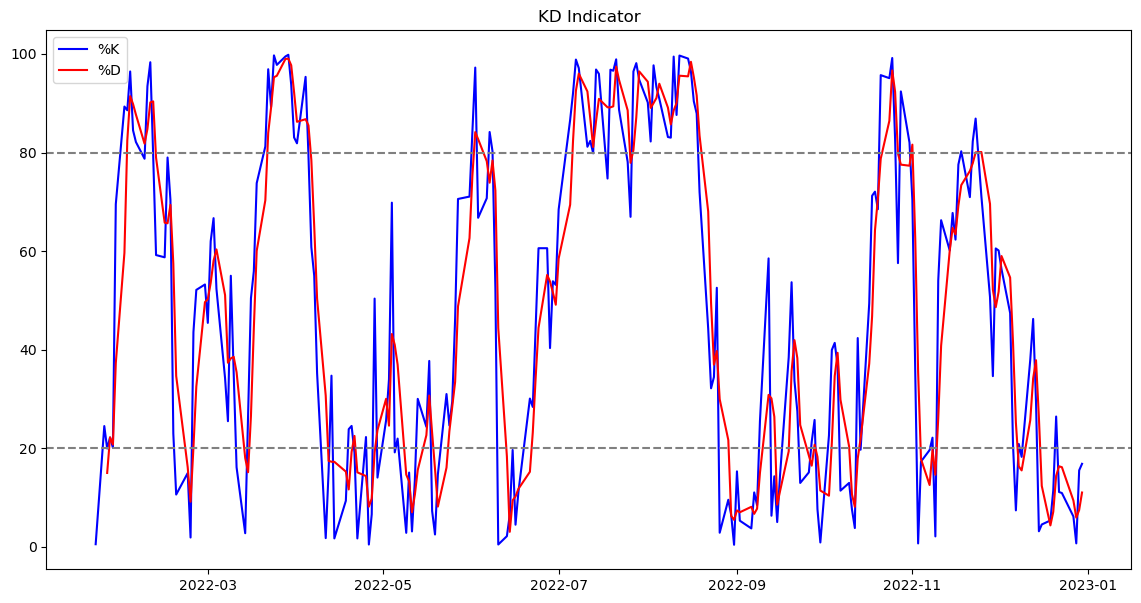

In [6]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['%K'], label='%K', color='blue')
plt.plot(df.index, df['%D'], label='%D', color='red')
plt.axhline(y=80, color='grey', linestyle='--')
plt.axhline(y=20, color='grey', linestyle='--')
plt.legend(loc='upper left')
plt.title('KD Indicator')
plt.show()